# Dataset yang digunakan adalah dataset kartu kredit
Target yang diprediksi adalah apakah nasabah berlaku curang atau tidak (1 / 0)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

## Import Data

In [3]:
from google.colab import files 
import pandas as pd 
import io 


uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv'])) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Cek terlebih dahulu komposisi dari target kolom (Class)

In [5]:
df["Class"].value_counts()

0    30000
1      492
Name: Class, dtype: int64

Pada kolom Class, komposisi dari nilainya tidak merata. Terdapat 3000 data yang bernilai 0 atau tidak curang, sedangkan yang curang atau 1 terdapat 492 data. Hal ini dimanakan *Imbalanced Class*

Solusi untuk mengatasinya adalah dengan mengganti scoring dari `accuracy` ke `F1-Score`

### Missing value plot

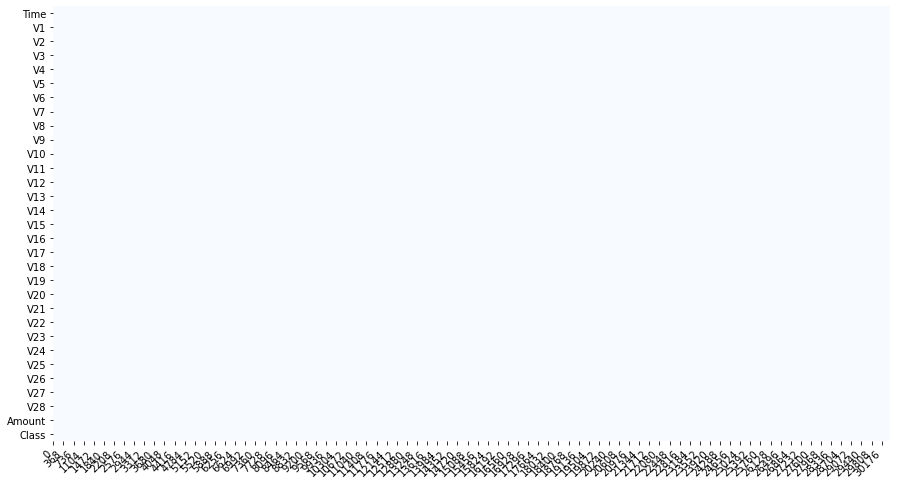

In [6]:
from jcopml.plot import plot_missing_value

plot_missing_value(df)

## Dataset Spliting

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Class")
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

## Import Library untuk Preprocessing

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVC


#Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), X_train.columns)
])

pipeline = Pipeline([
        ('prep', preprocessor),
        ('algo', SVC(max_iter=500))
])

X_train.columns = menggunakan semua kolom yang ada pada dataset X_train

Untuk pemodelan ini, saya menggunakan Support Vector Machine untuk Classifier

## Tunning dan Pemodelan

In [16]:
model = GridSearchCV(pipeline, gsp.svm_params,scoring='f1', cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  2.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.9847715736040609 0.9461901651981198 0.9795918367346939


Hasil dari tunning mennggunakan F1-Score adalah 0.98

---

Parameter terbaik untuk menangani kasus ini pada SVM adalah :

*   C (penalty) = 1000
*   Gamma = 0.001



## Evaluasi Model dengan Confusion Matrix

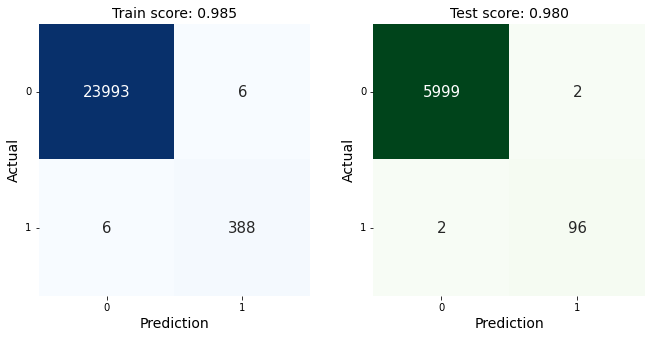

In [17]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train, y_train, X_test, y_test, model)